# Modeling Spring Motion with Analytical Model, Computational Model, and Experimental Data

In [129]:
# Import Libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# Constants
gravitational_acceleration = -9.81  # m/s^2
mass = 0.2  # kg
computational_spring_constant = 24.34963769  # N/m

In [131]:
# Computational Model
def computational_model(times, computational_spring_constant, computational_amplitude):
    accelerations = [0]
    velocities = [0]
    displacements = [computational_amplitude]
    for i in range(len(times) - 1):
        accelerations.append(-computational_spring_constant * displacements[-1])
        velocities.append(velocities[-1] + accelerations[-1] * (times[i + 1] - times[i]))
        displacements.append(displacements[-1] + velocities[-1] * (times[i + 1] - times[i]))
    return accelerations, velocities, displacements

In [132]:
# Load Experimental Data and Fit Analytical Model
data1 = pd.read_csv("MotionData1.csv")

In [133]:
def analyticial_model(times):
    positions = []
    for time in times:
        positions.append(data1["Position (m)"][0] * math.cos(math.sqrt(computational_spring_constant / mass) * time))
    return positions

In [134]:
# Compute Models
times = np.linspace(0, 10, 10000)
accelerations, velocities, displacements = computational_model(times, computational_spring_constant, data1["Position (m)"][0])
analytical_positions = analyticial_model(times)

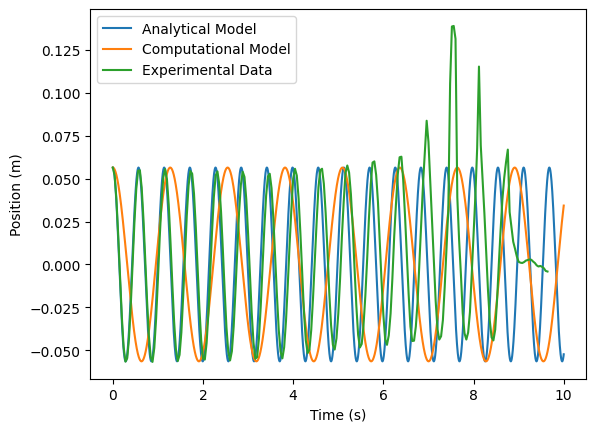

In [135]:
# Plot Models
plt.plot(times, analytical_positions, label="Analytical Model")
plt.plot(times, displacements, label="Computational Model")
plt.plot(data1["Time (s)"], data1["Position (m)"], label="Experimental Data")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.savefig(f"Data1.png", dpi=300)
plt.show()